# KMEANS


In [38]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

### Chọn số cụm K theo phương pháp Elbow 

In [39]:
data = pd.read_csv("../data/bank-full.csv", sep=";", quotechar='"', engine="python")

In [40]:
nummeric_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
data_clustering = data[nummeric_cols]

### Scaling 


In [41]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_clustering)

Đã lưu biểu đồ Elbow vào 'kmeans_elbow_plot.png'


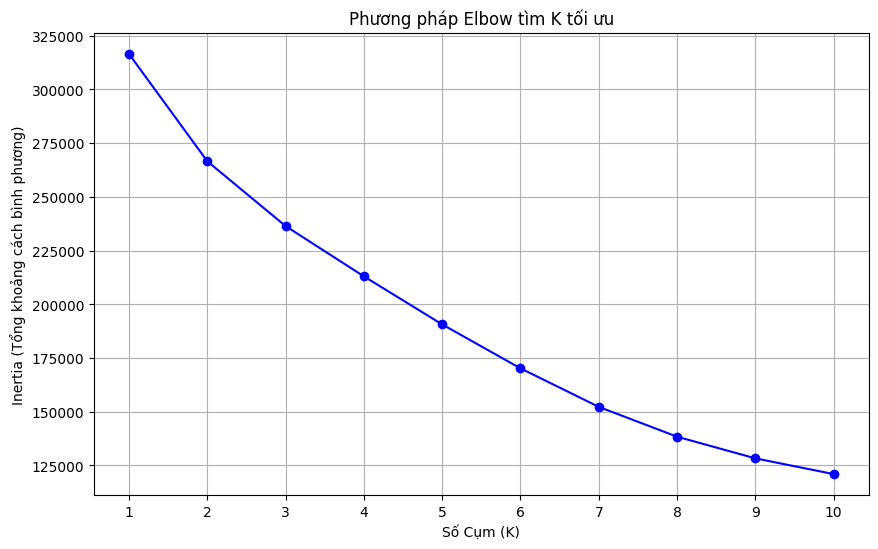

In [42]:
sse = {}
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(data_scaled)
    sse[k] = kmeans.inertia_

plt.figure(figsize=(10, 6))
plt.plot(list(sse.keys()), list(sse.values()), 'bo-')
plt.xlabel('Số Cụm (K)')
plt.ylabel('Inertia (Tổng khoảng cách bình phương)')
plt.title('Phương pháp Elbow tìm K tối ưu')
plt.xticks(list(sse.keys()))
plt.grid(True)
plt.savefig('kmeans_elbow_plot.png')

print("Đã lưu biểu đồ Elbow vào 'kmeans_elbow_plot.png'")

Nhìn vào biểu đồ, chúng ta tìm kiếm một "điểm khuỷu tay" (elbow point) - là điểm mà tại đó đường cong bắt đầu "thoải" ra, không còn dốc như trước.

-Từ K=1 đến K=2, độ dốc giảm rất mạnh.

-Từ K=2 đến K=3, độ dốc vẫn còn giảm đáng kể.

-Từ K=3 đến K=4, độ dốc giảm ít hơn.

-Từ K=4 trở đi (K=4, 5, 6...), đường cong trở nên khá phẳng.

Điều này cho thấy rằng việc tăng từ 3 cụm lên 4 cụm vẫn mang lại lợi ích (giảm inertia đáng kể), nhưng tăng từ 4 lên 5 thì lợi ích không còn nhiều.

K=4 sẽ là một "điểm khuỷu tay" hợp lý.

### Cluster với K = 4

In [43]:
kmeans = KMeans(n_clusters= 4, init='k-means++', n_init=10, random_state=42)

cluster_labels = kmeans.fit_predict(data_scaled)
print("Hoàn tất K-means.")

# Gán nhãn Cụm vào DataFrame gốc
df_analysis = data[nummeric_cols].copy()
df_analysis['Cluster'] = cluster_labels
print("\n--- Phân tích đặc điểm trung bình của các Cụm ---")
cluster_summary = df_analysis.groupby('Cluster').mean()

# Thêm cột 'Count' để xem kích thước của mỗi cụm
cluster_summary['Count'] = df_analysis['Cluster'].value_counts()

cols = ['Count'] + [col for col in cluster_summary.columns if col != 'Count']
cluster_summary = cluster_summary[cols]
print(cluster_summary.to_markdown(floatfmt=".2f"))

cluster_summary.to_csv("kmeans_cluster_analysis.csv")
print("\nĐã lưu kết quả phân tích vào 'kmeans_cluster_analysis.csv'")

Hoàn tất K-means.

--- Phân tích đặc điểm trung bình của các Cụm ---
|   Cluster |    Count |   age |   balance |   day |   duration |   campaign |   pdays |   previous |
|----------:|---------:|------:|----------:|------:|-----------:|-----------:|--------:|-----------:|
|         0 | 22719.00 | 34.11 |    924.92 | 15.94 |     273.44 |       2.27 |    2.56 |       0.07 |
|         1 |  6294.00 | 39.33 |   1337.76 | 13.82 |     258.00 |       2.12 |  262.08 |       3.55 |
|         2 |  1792.00 | 40.49 |   1118.51 | 22.28 |     158.66 |      14.25 |    0.07 |       0.02 |
|         3 | 14406.00 | 52.46 |   2093.02 | 15.67 |     246.52 |       2.40 |    7.60 |       0.16 |

Đã lưu kết quả phân tích vào 'kmeans_cluster_analysis.csv'


### Cụm 0: "Nhóm trẻ tuổi, mới (hoặc ít tương tác)"

* **Số lượng:** 22,719 (Nhóm đông nhất).
* **Đặc điểm chính:**
    * `age`: **Trẻ nhất** (trung bình 34 tuổi).
    * `balance`: Thấp (trung bình 924).
    * `pdays` & `previous`: Gần như bằng 0.
### Cụm 1: "Nhóm đã tương tác thành công (Trung thành)"

* **Số lượng:** 6,294.
* **Đặc điểm chính:**
    * `pdays`: **Rất cao** (trung bình 262 ngày kể từ lần liên hệ trước).
    * `previous`: **Cao nhất** (trung bình 3.55 lần liên hệ trước).
### Cụm 2: "Nhóm bị làm phiền (Spammed)"

* **Số lượng:** 1,792 (Nhóm nhỏ nhất).
* **Đặc điểm chính:**
    * `campaign`: **Cực kỳ cao** (trung bình 14.25 lần gọi trong chiến dịch này).
    * `duration`: **Rất thấp** (trung bình 158 giây).
### Cụm 3: "Nhóm lớn tuổi, giàu có"

* **Số lượng:** 14,406.
* **Đặc điểm chính:**
    * `age`: **Lớn tuổi nhất** (trung bình 52 tuổi).
    * `balance`: **Cao nhất** (trung bình 2093).

## Tỷ lệ "yes/no" trong từng cụm


In [45]:
df_analysis = data[['y']].copy()
df_analysis['Cluster'] = cluster_labels
print("\nBảng đếm 'yes'/'no' cho mỗi Cụm")
cluster_y_counts = pd.crosstab(df_analysis['Cluster'], df_analysis['y'])
print(cluster_y_counts.to_markdown())

print("\nTỷ lệ % 'yes'/'no' cho mỗi Cụm (Normalized)")
cluster_y_percentage = pd.crosstab(df_analysis['Cluster'], df_analysis['y'], normalize='index') * 100
print(cluster_y_percentage.to_markdown(floatfmt=".2f"))


Bảng đếm 'yes'/'no' cho mỗi Cụm
|   Cluster |    no |   yes |
|----------:|------:|------:|
|         0 | 20294 |  2425 |
|         1 |  5049 |  1245 |
|         2 |  1726 |    66 |
|         3 | 12853 |  1553 |

Tỷ lệ % 'yes'/'no' cho mỗi Cụm (Normalized)
|   Cluster |    no |   yes |
|----------:|------:|------:|
|         0 | 89.33 | 10.67 |
|         1 | 80.22 | 19.78 |
|         2 | 96.32 |  3.68 |
|         3 | 89.22 | 10.78 |
